<a href="https://colab.research.google.com/github/oleksandr-maksymikhin/mit-ai-course/blob/main/AI_2_Recitation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees Notebook



## The Problem: The Legal System of the United States
The legal system of the United States operates at the state level and at the federal level. Federal courts hear cases beyond the scope of state law. Federal courts are divided into:
- District Courts: Makes initial decision
- Circuit Courts: Hears appeals from the district courts
- Supreme Court: Highest level – makes final decision


The Supreme Court of the United States: consists of nine justices, appointed by the President. Justices are distinguished judges, professors of law, and state and federal attorneys. The Supreme Court of the United States (SCOTUS) decides on the most difficult and controversial cases. These cases often involve the interpretation of the Constitution. The decisions made by the Supreme Court can have significant social, political, and economic consequences.


Legal academics and political scientists frequently predict SCOTUS decisions through in-depth studies of cases and individual justices. In 2002, Andrew Martin, a professor of political science at Washington University in St. Louis, took a different approach by using a statistical model constructed from data to make predictions about decisions. Teaming up with his colleagues, they decided to test the accuracy of this model against a panel of experts.


Martin employed a method called Classification and Regression Trees (CART) for his predictions.

**Why CART?** One reason is that other models are often not easily interpretable. While model coefficients can indicate the importance and relative effect of variables, they do not provide a straightforward explanation of how the decision is made.

CART, on the other hand, allows for a more intuitive understanding of the decision-making process by constructing a decision tree. This tree structure provides a clear and interpretable representation of the factors and criteria used in reaching a particular outcome.


## About the Dataset


During the period from 1994 to 2001, the same nine justices served on the SCOTUS. These justices were Breyer, Ginsburg, Kennedy, O'Connor, Rehnquist (Chief Justice), Scalia, Souter, Stevens, and Thomas.

This time frame represents a rare and valuable dataset as it encompasses the longest period with the same set of justices in over 180 years.

For the purpose of prediction, the focus will be on Justice Stevens' decisions. He initially had a moderate stance but gradually became more liberal, despite identifying himself as a conservative.

The dependent variable in this study is whether Justice Stevens voted to reverse the lower court decision. A value of 1 indicates a vote to reverse, while a value of 0 indicates a vote to affirm.

The independent variables include various properties of the case, such as:

- **Circuit court of origin** (ranging from 1st to 11th, DC, and FED)
- **Issue area of the case** (e.g., civil rights, federal taxation)
- **Type of petitioner and type of respondent** (e.g., US, an employer)
- **Ideological direction of the lower court decision** (conservative or liberal)
- **Whether the petitioner argued that a law or practice was unconstitutional.**


### Data Exploration
Navigate to the directory containing the file containing the data: stevens.csv

#### Only for Colab

Since Google Colab is an online service, a file must be uploaded to Colab's local file system in order for its contents to be accessed. This procedure consists of the following steps:
1. Navigate to Colab's local file system
2. Press the Upload button and then choose the file to upload (stevens.csv)
3. Verify that the upload was completed successfully by locating the file in your local file system.
The Figure below depicts step-by-step the procedure described above.



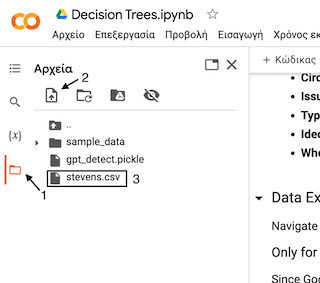

#### Load the Data








In [ ]:
import pandas as pd
import numpy as np

stevens = pd.read_csv("stevens.csv")

In [ ]:
stevens.head()

,Docket,Term,Circuit,Issue,Petitioner,Respondent,LowerCourt,Unconst,Reverse
0,93-1408,1994,2nd,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
1,93-1577,1994,9th,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
2,93-1612,1994,5th,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
3,94-623,1994,1st,EconomicActivity,BUSINESS,BUSINESS,conser,0,1
4,94-1175,1995,7th,JudicialPower,BUSINESS,BUSINESS,conser,0,1


The `.info()` function in Pandas provides a concise summary of a DataFrame, presenting information about column names, data types, non-null values, and memory usage. It serves as a valuable tool for understanding and assessing the structure and properties of your data.

When you call `.info()` on a DataFrame, it displays the following information:

1. The total number of entries (rows) in the DataFrame.
2. The number of columns and their names.
3. The count of non-null values in each column.
4. The data type of each column.
5. The memory usage of the DataFrame.


In [ ]:
stevens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Docket      566 non-null    object
 1   Term        566 non-null    int64 
 2   Circuit     566 non-null    object
 3   Issue       566 non-null    object
 4   Petitioner  566 non-null    object
 5   Respondent  566 non-null    object
 6   LowerCourt  566 non-null    object
 7   Unconst     566 non-null    int64 
 8   Reverse     566 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 39.9+ KB


This code generates a figure with multiple subplots, each representing a histogram for a specific set of columns. It uses the Matplotlib library to create the subplots and plot the histograms. The column names for the histograms are defined, and the number of rows and columns for the subplots is determined. The code then iterates over the column names, selects the corresponding subplot, and plots a histogram using the data from the 'stevens' DataFrame. It sets the subplot title and adjusts the spacing between the subplots. Finally, it displays the figure with all the histograms. The purpose of this code is to visually analyze the distribution of data in different columns of the 'stevens' DataFrame using histograms.


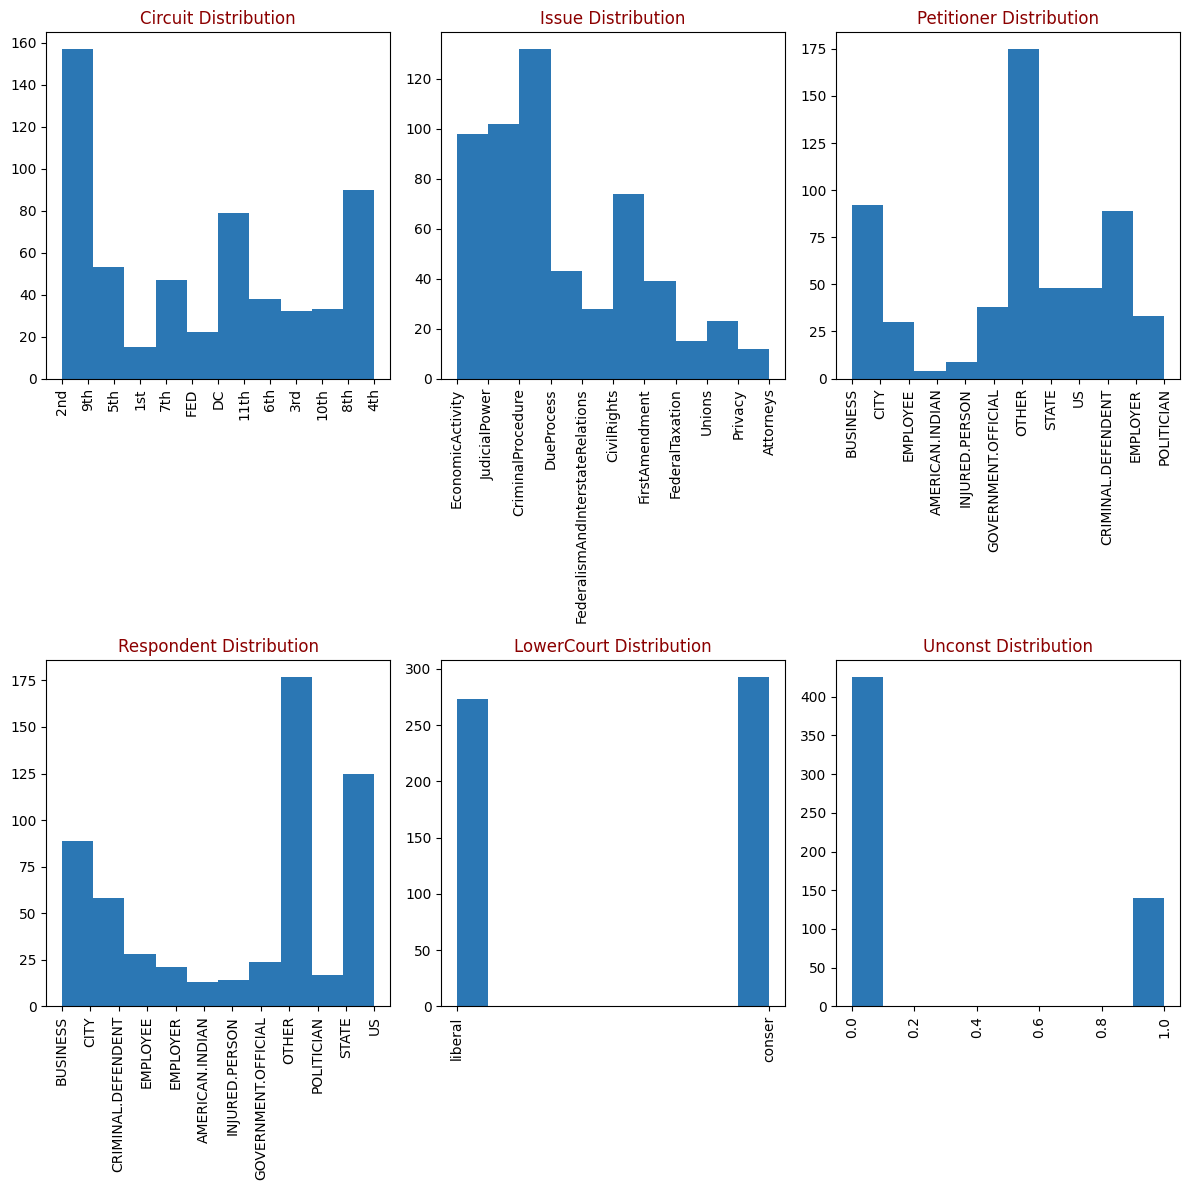

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
# Define the column names for the histograms
column_names = ['Circuit', 'Issue', 'Petitioner', 'Respondent', 'LowerCourt', 'Unconst']

# Determine the number of rows and columns for subplots
num_rows = 2
num_cols = 3

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Iterate over the column names and plot the histograms
for i, column_names in enumerate(column_names):
    # Compute the row and column indices for the subplot
    row = i // num_cols
    col = i % num_cols

    # Select the subplot and plot the histogram
    ax = axes[row, col]
    ax.hist(stevens[column_names], bins=10, facecolor = '#2b77b4')

    # Set the subplot title and rotate x-axis labels
    ax.set_title(column_names + " Distribution", color='DarkRed')
    ax.tick_params(axis='x', rotation=90)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


A histogram provides information about the distribution of values within a dataset. It displays the frequency or count of observations falling within specific intervals or "bins" along the x-axis, while the height of each bar represents the number of occurrences in that bin. By examining a histogram, you can gather insights into the central tendency, spread, and shape of the data. It allows you to identify patterns, outliers, skewness, and the presence of multiple modes. Histograms are particularly useful for understanding the range and distribution of numerical data, making them a valuable tool in data exploration, identifying data anomalies, and making informed decisions based on the characteristics of the dataset.

We can extract statistics for columns also by calculating different (simple) statistics.

In [ ]:
print ("The percentage of the times that vote reverse is: ", round(sum(stevens["Reverse"])/len(stevens)*100, 2), "%")

The percentage of the times that vote reverse is:  54.59 %


## Understanding the data



Seaborn's `.displot()` function to create a visualization that combines a histogram and a KDE plot to show the distribution of a variable from the `stevens` dataset, while also incorporating a grouping variable for comparison purposes.

In [ ]:
stevens.keys()

Index(['Docket', 'Term', 'Circuit', 'Issue', 'Petitioner', 'Respondent',
       'LowerCourt', 'Unconst', 'Reverse'],
      dtype='object')

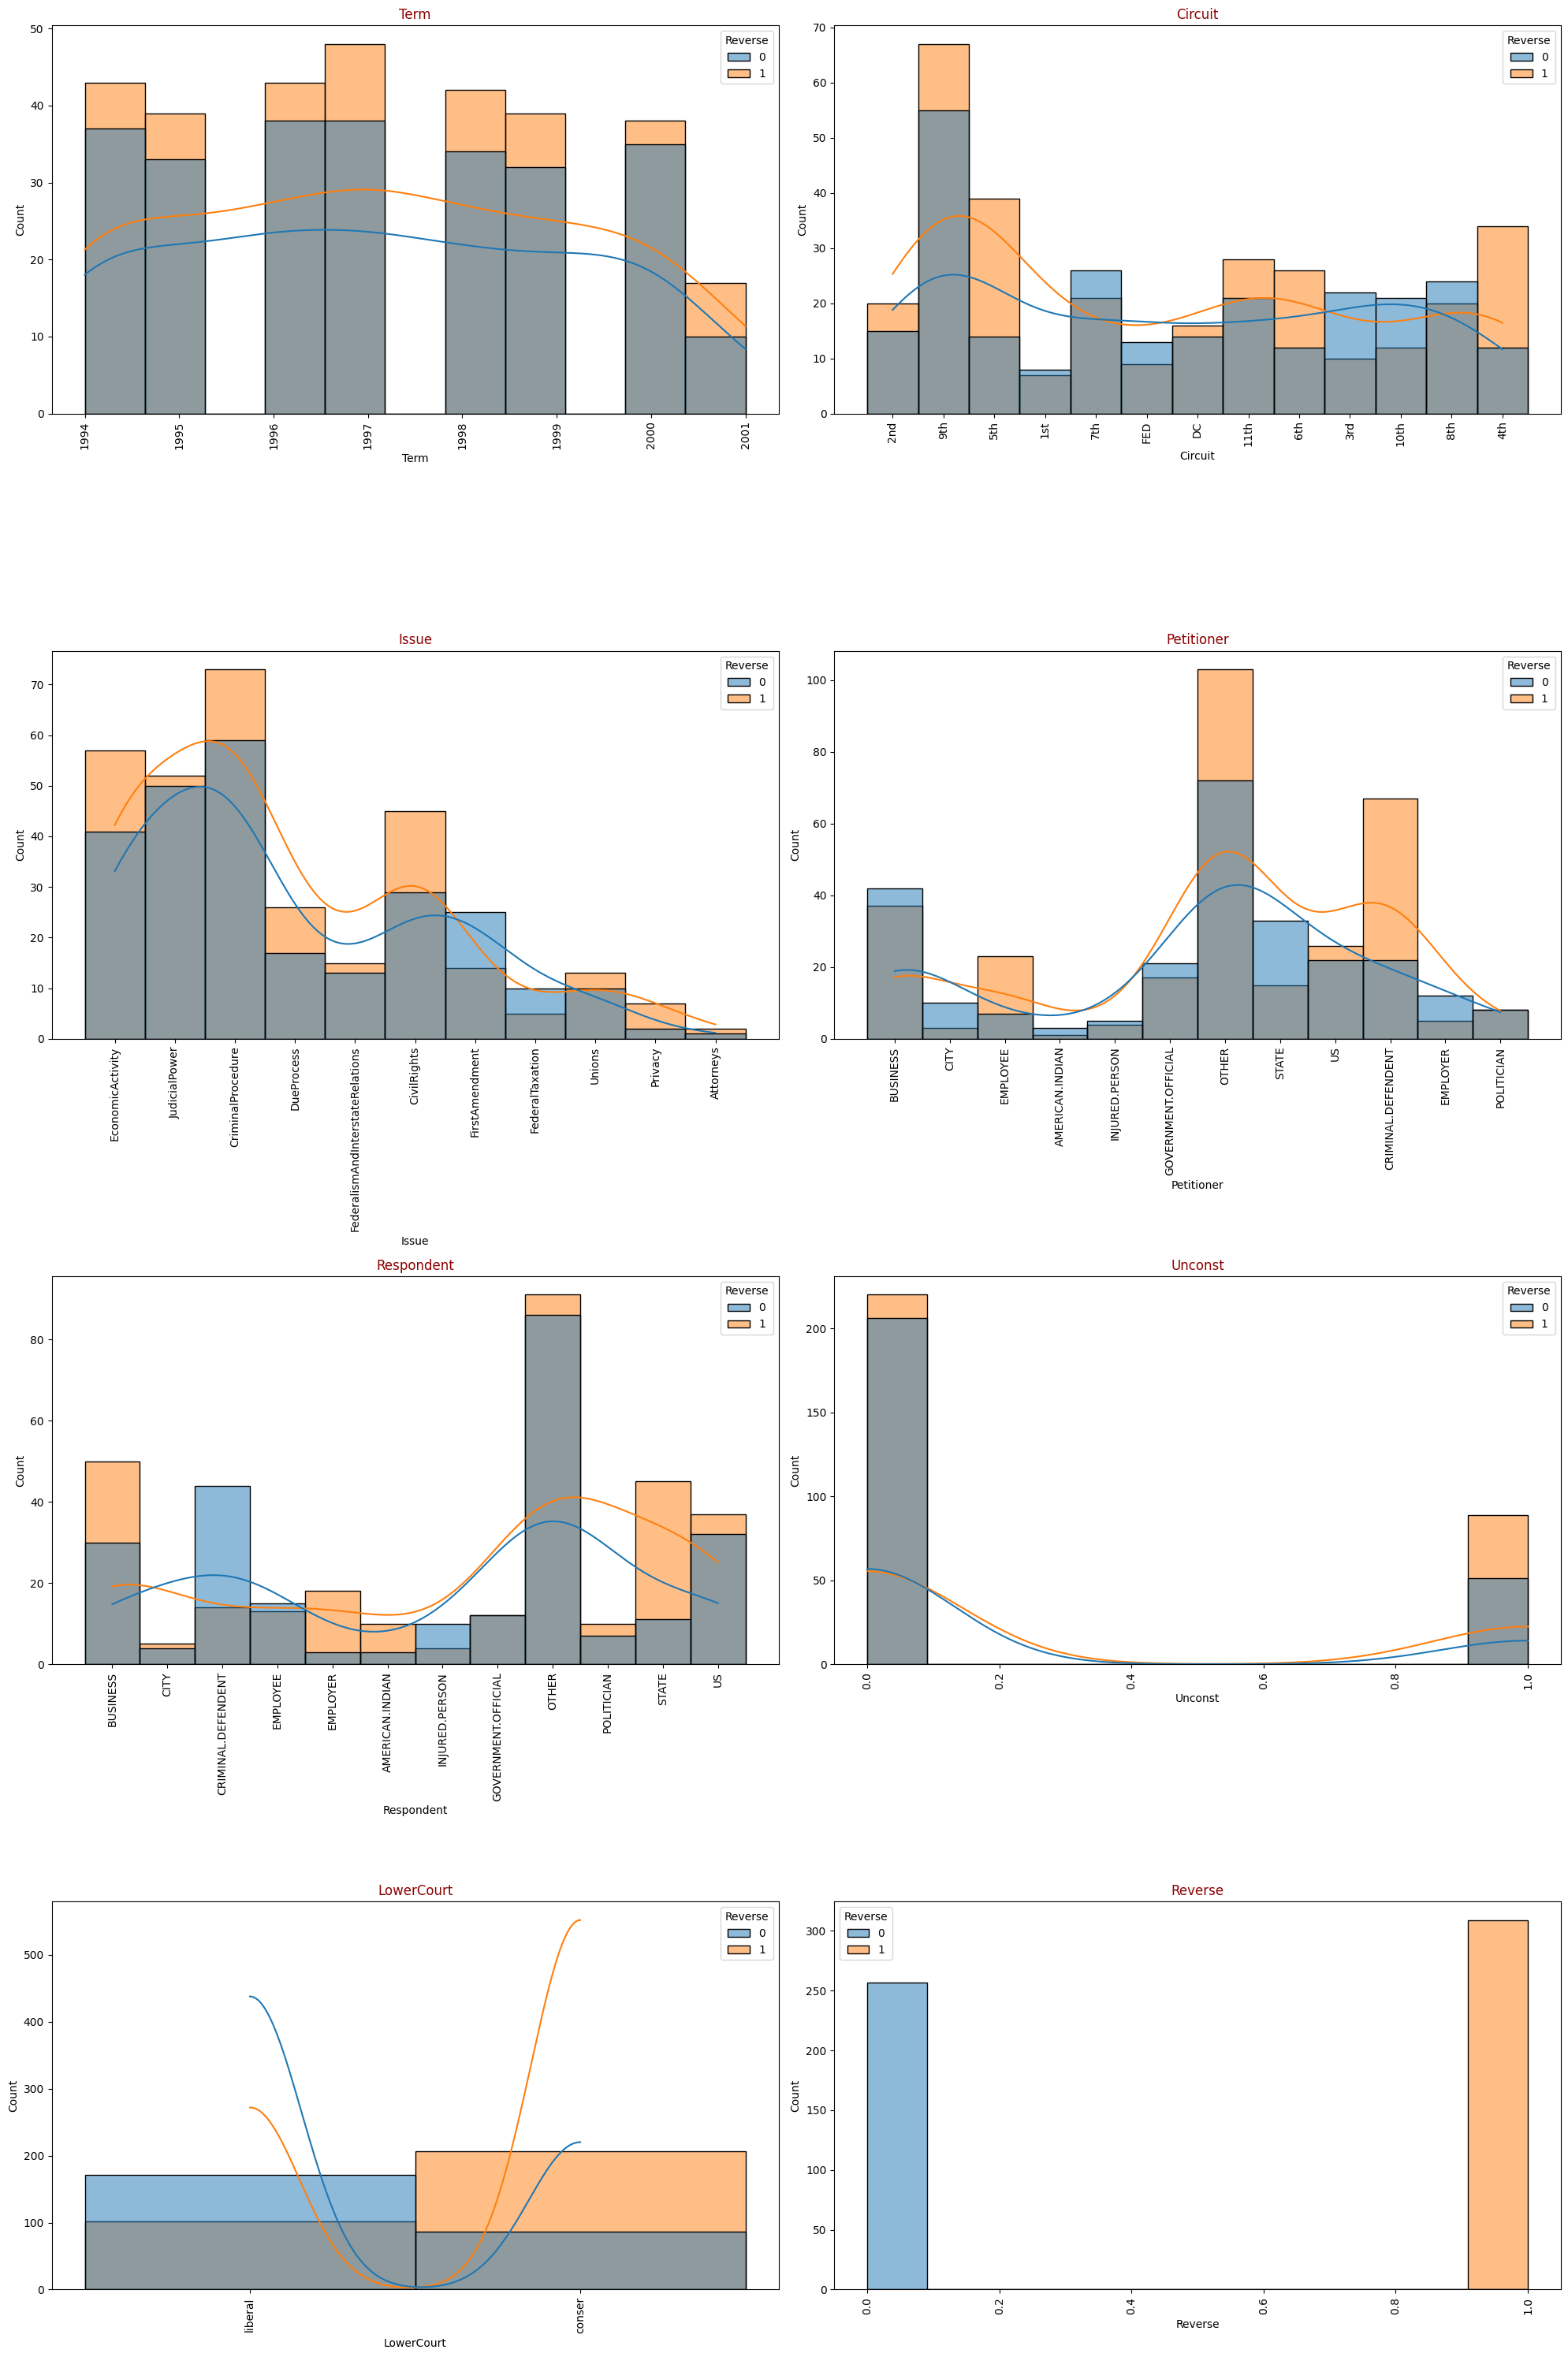

In [ ]:
import seaborn as sns
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")


features = ['Term', 'Circuit', 'Issue', 'Petitioner', 'Respondent', 'Unconst',
            'LowerCourt', 'Reverse']

fig, axes = plt.subplots(4, 2, figsize=(20, 30))
axes = axes.flatten()
for i, f in enumerate(features):
    g = sns.histplot(data=stevens, kde=True, x=stevens[f], hue='Reverse', ax=axes[i])
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    axes[i].set_title(f, color='DarkRed')


plt.tight_layout()
plt.show()

The LabelEncoder from scikit-learn is used to encode each categorical column into numeric labels. Each unique category in a column is assigned a unique integer label. By performing label encoding, the categorical variables 'Circuit', 'Issue', 'Petitioner', 'Respondent', 'LowerCourt', 'Unconst', and 'Reverse' are transformed into numeric representations.

In [ ]:
# Split the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

mappings = {}
# Perform label encoding for categorical variables
le = LabelEncoder()
stevens['Circuit'] = le.fit_transform(stevens['Circuit'])
mappings['Circuit'] = dict(zip(le.classes_, le.transform(le.classes_)))

stevens['Issue'] = le.fit_transform(stevens['Issue'])
mappings['Issue'] = dict(zip(le.classes_, le.transform(le.classes_)))

stevens['Petitioner'] = le.fit_transform(stevens['Petitioner'])
mappings['Petitioner'] = dict(zip(le.classes_, le.transform(le.classes_)))

stevens['Respondent'] = le.fit_transform(stevens['Respondent'])
mappings['Respondent'] = dict(zip(le.classes_, le.transform(le.classes_)))

stevens['LowerCourt'] = le.fit_transform(stevens['LowerCourt'])
mappings['LowerCourt'] = dict(zip(le.classes_, le.transform(le.classes_)))

stevens['Unconst'] = le.fit_transform(stevens['Unconst'])
mappings['Unconst'] = dict(zip(le.classes_, le.transform(le.classes_)))

stevens['Reverse'] = le.fit_transform(stevens['Reverse'])
mappings['Reverse'] = dict(zip(le.classes_, le.transform(le.classes_)))

### Data Processing
- Now, let's split our data into a training set and a testing set using sample.split.
- Set our seed (random state) so we all get the same split!
- You typically want to put somewhere between **50%** and **80%** of the data in the training set.


# Model Training

## Evaluation settings

Splitting our data into training and testing sets is necessary to ensure the accurate evaluation and generalization of machine learning models. The testing set provides an unbiased assessment of the model's performance on unseen data, enabling us to gauge its effectiveness in real-world scenarios. By evaluating the model's performance on the testing set, we can determine its ability to generalize beyond the training data, which is crucial for reliable predictions. Additionally, this data split helps us detect and mitigate overfitting, where the model memorizes the training data instead of learning meaningful patterns. Moreover, the separation allows for fine-tuning of hyperparameters, enhancing the model's performance. Overall, the division into train and test sets is fundamental for robust model evaluation, generalization assessment, prevention of overfitting, and effective hyperparameter tuning.

But we also have to determine the ways in which we will evaluate both the model. Such methods include using accuracy, confusion matrix, etc.

$Accuracy = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$


We could also gain additional information by calculating the confusion matrix, which consists of:

* **True Positive (TP)**: which refers to a sample belonging to the positive class being classified correctly.
* **True Negative (TN)**: which refers to a sample belonging to the negative class being classified correctly.
* **False Positive (FP)**: which refers to a sample belonging to the negative class but being classified wrongly as belonging to the positive class.
* **False Negative (FN)**: which refers to a sample belonging to the positive class but being classified wrongly as belonging to the negative class.

![confusionmatrix](https://hackernoon.com/hn-images/1*y4HwoAEgx1Js19hCkPM7XA.png "a title")


In the context of a medical classifier for a dangerous disease, the value that is typically more useful from the confusion matrix is the **true positive (TP)** or the sensitivity/recall.

True positive (TP) represents the number of correctly classified positive cases, i.e., the instances of the Justice Stevens voted to reverse the lower court decision. Sensitivity or recall gives the proportion of actual positive cases that were correctly classified as positive.


$Recall = \frac{TruePositive}{TruePositive + FalseNegative}$



# The baseline

Setting a baseline is important because it provides a benchmark for comparison and helps assess the performance and effectiveness of the trained model. The baseline acts as a reference point against which the model's performance can be evaluated, allowing us to determine if the model is providing any improvement over a simple or naive approach. By establishing a baseline, we gain insights into the inherent difficulty of the problem and understand the minimum level of performance we should expect. It helps us identify whether the model is adding value and justifies the investment in training and deploying a more complex model. Additionally, the baseline can serve as a sanity check, ensuring that the model's performance is reasonable and that any observed improvements are not merely due to chance. Ultimately, establishing a baseline is a crucial step in model development, enabling us to make informed decisions and measure the true impact of our trained model.


In [ ]:
def plot_cm_as_image(cm):
    conf_matrix=pd.DataFrame(data=cm, columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
    plt.figure(figsize = (8,5))
    sns.heatmap(conf_matrix, annot=True, fmt='d',cmap="YlGnBu")

### A simple classifier (the baseline)

Simple baseline method - **always predict 0**!

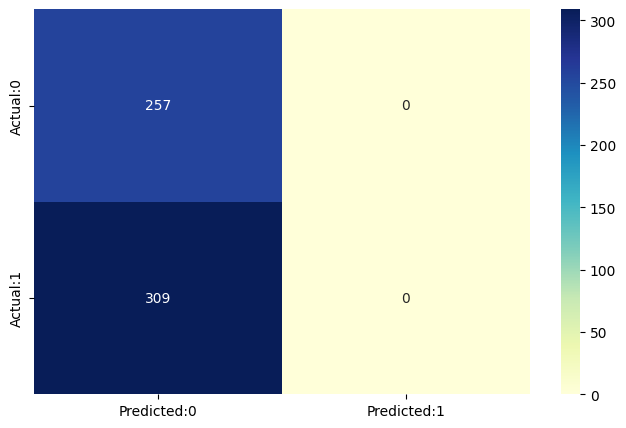

In [ ]:
from sklearn.metrics import confusion_matrix
# Confusion matrix
cm = confusion_matrix(stevens["Reverse"], [0]*len(stevens))
plot_cm_as_image(cm)

In [ ]:
print ("Accuracy =", 257/len(stevens))

Accuracy = 0.4540636042402827


But in this case: **recall = 0**!

Can an attribute predict this index more precisely in terms of accuracy?

- **LowerCourt**: Accuracy= 0.3321 Recall= 0.330

The rest of the attributes are categorical, which is why it is more difficult to create a classifier from them. We need to determine the correlations between these attributes and classes 1 and 0.

## Preparing the experimentation

In [ ]:
# Split the data
X = stevens[['Circuit', 'Issue', 'Petitioner', 'Respondent', 'LowerCourt', 'Unconst']]
y = stevens['Reverse']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3000)

print (X_train)

     Circuit  Issue  Petitioner  Respondent  LowerCourt  Unconst
418       12      3          11           8           1        0
25        10      8           6           1           1        0
385        6      7           8           8           1        1
223        1      4           1           6           0        0
377       10      1           8           8           1        0
..       ...    ...         ...         ...         ...      ...
477        6      2           3          10           0        0
78        10      2          11           1           1        0
26         0      7           6           1           1        0
563       10      2           8          11           0        1
508        7      2           3          11           0        1

[424 rows x 6 columns]


In [ ]:
print ("Training Dataset has :", len(X_train), "rows")
print ("Testing Dataset has :", len(X_test), "rows")

Training Dataset has : 424 rows
Testing Dataset has : 142 rows


### Decision Trees - CART Algorithm


CART, which stands for Classification and Regression Trees, is a popular decision tree algorithm used in machine learning. It is a versatile and interpretable method that can be applied to both classification and regression tasks. CART works by recursively partitioning the data based on feature values to create a tree-like structure. At each step, it selects the best feature and split point that maximize the separation of classes or minimize the variance in the target variable. The resulting tree can be used for making predictions on new data by traversing the tree from the root node to the leaf nodes. CART's simplicity, ability to handle both categorical and numerical features, and interpretability make it a widely used algorithm in various domains.

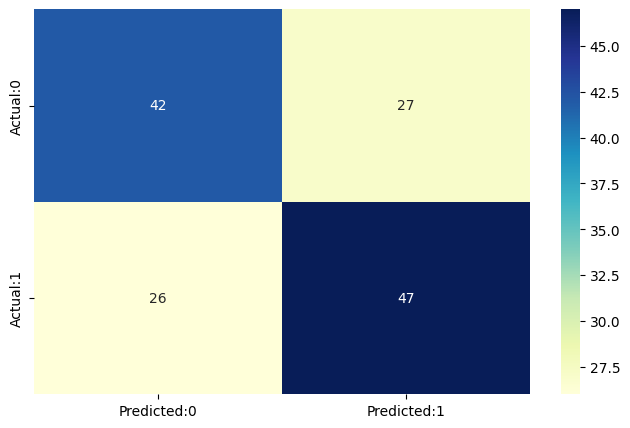

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Build the CART model
stevens_tree = DecisionTreeClassifier(min_samples_leaf=25)
stevens_tree.fit(X_train, y_train)

# Predict on the test set
predict_cart = stevens_tree.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, predict_cart)
plot_cm_as_image(cm)

In [ ]:
# Calculate accuracy
accuracy = (cm[0, 0] + cm[1, 1]) / sum(sum(cm))
print("Accuracy:", accuracy)

Accuracy: 0.6267605633802817


In [ ]:
# Calculate recall
recall = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print("Recall:", recall)

Recall: 0.6438356164383562


The `plot_tree` is a function that creates a visual representation of a decision tree model, enabling us to understand and interpret the decision-making process of the tree and gain insights into how the features contribute to the predictions.

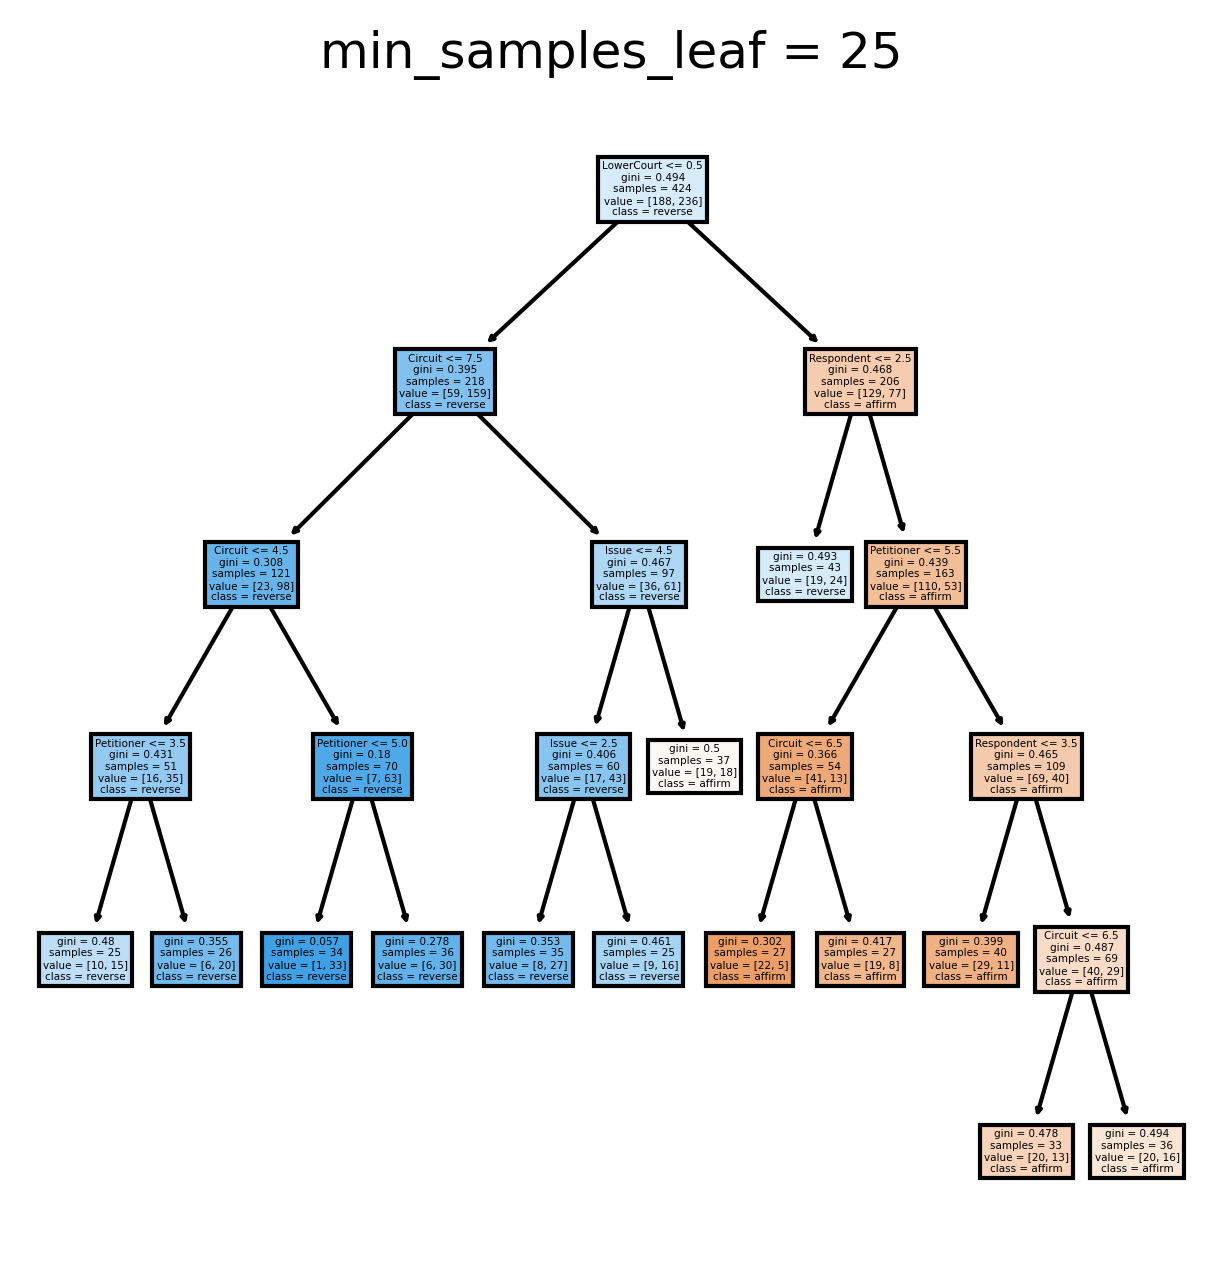

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(5, 5), dpi=300)
plot_tree(stevens_tree, filled=True, feature_names=['Circuit', 'Issue', 'Petitioner', 'Respondent', 'LowerCourt', 'Unconst'], class_names = ["affirm", "reverse"])
plt.title(f"min_samples_leaf = 25")
plt.savefig('out_min_samples_leaf_25.pdf')
plt.show()

# Code for visualizing tree

In [ ]:
from sklearn.tree._export import _MPLTreeExporter,  _BaseTreeExporter, check_is_fitted, _tree, _criterion
class _BaseTreeExporterLabels(_BaseTreeExporter):
    def node_to_str(self, tree, node_id, criterion):
        # Generate the node content string
        if tree.n_outputs == 1:
            value = tree.value[node_id][0, :]
        else:
            value = tree.value[node_id]

        # Should labels be shown?
        labels = (self.label == "root" and node_id == 0) or self.label == "all"

        characters = self.characters
        node_string = characters[-1]

        # Write node ID
        if self.node_ids:
            if labels:
                node_string += "node "
            node_string += characters[0] + str(node_id) + characters[4]

        # Write decision criteria
        if tree.children_left[node_id] != _tree.TREE_LEAF:
            # Always write node decision criteria, except for leaves
            if self.feature_names is not None:
                feature = self.feature_names[tree.feature[node_id]]
            else:
                feature = "x%s%s%s" % (
                    characters[1],
                    tree.feature[node_id],
                    characters[2],
                )

            score_node = round(tree.threshold[node_id], self.precision)
            if characters[3] == "<=":
                in_string = ",".join([i for i, j in mappings[feature].items() if j <= score_node])
            if characters[3] == "<":
                in_string = ",".join([i for i, j in mappings[feature].items() if j < score_node])
            if characters[3] == ">":
                in_string = ",".join([i for i, j in mappings[feature].items() if j > score_node])
            if characters[3] == ">=":
                in_string = ",".join([i for i, j in mappings[feature].items() if j >= score_node])

            node_string += "%s in [%s]\n" % (
                feature, in_string
                # characters[3],
                # round(tree.threshold[node_id], self.precision),
                # characters[4],
            )
        # Write impurity
        if self.impurity:
            if isinstance(criterion, _criterion.FriedmanMSE):
                criterion = "friedman_mse"
            elif isinstance(criterion, _criterion.MSE) or criterion == "squared_error":
                criterion = "squared_error"
            elif not isinstance(criterion, str):
                criterion = "impurity"
            if labels:
                node_string += "%s = " % criterion
            node_string += (
                str(round(tree.impurity[node_id], self.precision)) + characters[4]
            )

        # Write node sample count
        if labels:
            node_string += "samples = "
        if self.proportion:
            percent = (
                100.0 * tree.n_node_samples[node_id] / float(tree.n_node_samples[0])
            )
            node_string += str(round(percent, 1)) + "%" + characters[4]
        else:
            node_string += str(tree.n_node_samples[node_id]) + characters[4]

        # Write node class distribution / regression value
        if self.proportion and tree.n_classes[0] != 1:
            # For classification this will show the proportion of samples
            value = value / tree.weighted_n_node_samples[node_id]
        if labels:
            node_string += "value = "
        if tree.n_classes[0] == 1:
            # Regression
            value_text = np.around(value, self.precision)
        elif self.proportion:
            # Classification
            value_text = np.around(value, self.precision)
        elif np.all(np.equal(np.mod(value, 1), 0)):
            # Classification without floating-point weights
            value_text = value.astype(int)
        else:
            # Classification with floating-point weights
            value_text = np.around(value, self.precision)
        # Strip whitespace
        value_text = str(value_text.astype("S32")).replace("b'", "'")
        value_text = value_text.replace("' '", ", ").replace("'", "")
        if tree.n_classes[0] == 1 and tree.n_outputs == 1:
            value_text = value_text.replace("[", "").replace("]", "")
        value_text = value_text.replace("\n ", characters[4])
        node_string += value_text + characters[4]

        # Write node majority class
        if (
            self.class_names is not None
            and tree.n_classes[0] != 1
            and tree.n_outputs == 1
        ):
            # Only done for single-output classification trees
            if labels:
                node_string += "class = "
            if self.class_names is not True:
                class_name = self.class_names[np.argmax(value)]
            else:
                class_name = "y%s%s%s" % (
                    characters[1],
                    np.argmax(value),
                    characters[2],
                )
            node_string += class_name

        # Clean up any trailing newlines
        if node_string.endswith(characters[4]):
            node_string = node_string[: -len(characters[4])]

        return node_string + characters[5]

class _MPLTreeExporterLabel(_MPLTreeExporter, _BaseTreeExporterLabels):
    pass

def plot_treeLabel(
    decision_tree,
    *,
    max_depth=None,
    feature_names=None,
    class_names=None,
    label="all",
    filled=False,
    impurity=True,
    node_ids=False,
    proportion=False,
    rounded=False,
    precision=3,
    ax=None,
    fontsize=None,
):
    check_is_fitted(decision_tree)

    exporter = _MPLTreeExporterLabel(
        max_depth=max_depth,
        feature_names=feature_names,
        class_names=class_names,
        label=label,
        filled=filled,
        impurity=impurity,
        node_ids=node_ids,
        proportion=proportion,
        rounded=rounded,
        precision=precision,
        fontsize=fontsize,
    )
    return exporter.export(decision_tree, ax=ax)


# Visualize Tree

In [ ]:
from sklearn.tree import export_text

def my_tree (row):
    if row ["LowerCourt"] in ["conser"]:
        if row["Circuit"] in ['10th', '11th', '1st', '2nd', '3rd', '4th', '5th', '6th']:
            return 1
        else:
            if row["Issue"] in ['Attorneys', 'CivilRights', 'CriminalProcedure', 'DueProcess', 'EconomicActivity']:
                return 1
            else:
                return 0
    else:
        if row["Respondent"] in ['AMERICAN.INDIAN', 'BUSINESS', 'CITY']:
            return 1
        else:
            return 0

**How does the tree make the decisions?**
```
|--- LowerCourt in ['conser']
|   |--- Circuit in ['10th', '11th', '1st', '2nd', '3rd', '4th', '5th', '6th']
|   |   |--- return 1
|   |--- Circuit in ['7th', '8th', '9th', 'DC', 'FED']
|   |   |--- Issue in ['Attorneys', 'CivilRights', 'CriminalProcedure', 'DueProcess', 'EconomicActivity']
|   |   |   |--- return 1
|   |   |--- Issue in ['FederalTaxation', 'FederalismAndInterstateRelations', 'FirstAmendment', 'JudicialPower', 'Privacy', 'Unions']
|   |   |   |--- class: 0
|--- LowerCourt in ['liberal']
|   |--- Respondent in ['AMERICAN.INDIAN', 'BUSINESS', 'CITY']
|   |   |--- class: 1
|   |--- Respondent in ['CRIMINAL.DEFENDENT', 'EMPLOYEE', 'EMPLOYER', 'GOVERNMENT.OFFICIAL', 'INJURED.PERSON', 'OTHER', 'POLITICIAN', 'STATE', 'US']
|   |   |--- return 0
```




Python code imitating this decision tree

The initial split of the decision tree is observed on the "LowerCourt" column, which is evidently a significant factor in the classification process, as demonstrated in the preceding diagrams. By further analyzing the decision tree structure, we can gain insights into its decision-making mechanism and unravel the sequential steps employed for classification.


#### Hyper-parameters selection
#####  Select the best value of min_samples_leaf.

The first step in our code is to use a portion of our training data as a validation set. The validation set is used to evaluate the performance of different decision tree models with different values of min_samples_leaf. The purpose of the validation set is to assess the models' performance on data that was not used for training. This allows for an unbiased evaluation of the models and helps in selecting the best min_samples_leaf value.

In [ ]:
# Split the training data into StevensTrain2 and StevensValidate
spl_train = np.random.rand(len(X_train)) < 0.75
stevens_train2 = X_train[spl_train]
stevens_validate = X_train[~spl_train]

In [ ]:
print ("New - Training Dataset has :", len(stevens_train2), "rows")
print ("Validation Dataset has :", len(stevens_validate), "rows")
print ("Testing Dataset has :", len(X_test), "rows")

New - Training Dataset has : 319 rows
Validation Dataset has : 105 rows
Testing Dataset has : 142 rows


The code above splits the training data into StevensTrain2 and StevensValidate using a random split based on a seed value. Then, it builds three decision tree models (stevens_tree20, stevens_tree25, stevens_tree30) with different values of min_samples_leaf. Finally, it predicts on the validation set (stevens_validate) using each model and prints the confusion matrix for each model's predictions.

Build models with different values of min_samples_leaf.

Which one does the best on the validation set?

Accuracy: 0.6285714285714286
Recall: 0.7213114754098361


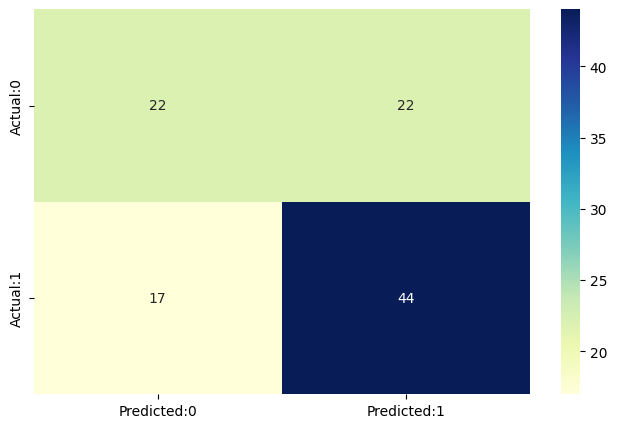

In [ ]:
stevens_tree20 = DecisionTreeClassifier(min_samples_leaf=20)
stevens_tree20.fit(stevens_train2, y_train[spl_train])

# Predict on the validation set and evaluate
predict20 = stevens_tree20.predict(stevens_validate)
confusion20 = confusion_matrix(y_train[~spl_train], predict20)
plot_cm_as_image(confusion20)

# Calculate accuracy
accuracy = (confusion20[0, 0] + confusion20[1, 1]) / sum(sum(confusion20))
print("Accuracy:", accuracy)

# Calculate recall
recall = confusion20[1, 1] / (confusion20[1, 0] + confusion20[1, 1])
print("Recall:", recall)

Accuracy: 0.6285714285714286
Recall: 0.7213114754098361


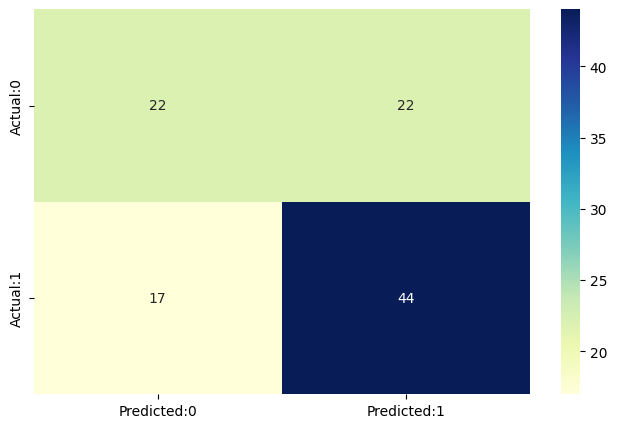

In [ ]:
stevens_tree25 = DecisionTreeClassifier(min_samples_leaf=25)
stevens_tree25.fit(stevens_train2, y_train[spl_train])

predict25 = stevens_tree25.predict(stevens_validate)
confusion25 = confusion_matrix(y_train[~spl_train], predict25)
plot_cm_as_image(confusion25)

# Calculate accuracy
accuracy = (confusion25[0, 0] + confusion25[1, 1]) / sum(sum(confusion25))
print("Accuracy:", accuracy)

# Calculate recall
recall = confusion25[1, 1] / (confusion25[1, 0] + confusion25[1, 1])
print("Recall:", recall)

Accuracy: 0.6571428571428571
Recall: 0.6557377049180327


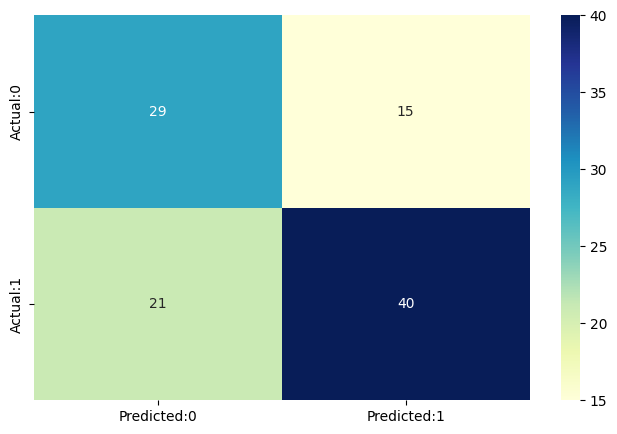

In [ ]:
stevens_tree30 = DecisionTreeClassifier(min_samples_leaf=30)
stevens_tree30.fit(stevens_train2, y_train[spl_train])


predict30 = stevens_tree30.predict(stevens_validate)
confusion30 = confusion_matrix(y_train[~spl_train], predict30)
plot_cm_as_image(confusion30)


# Calculate accuracy
accuracy = (confusion30[0, 0] + confusion30[1, 1]) / sum(sum(confusion30))
print("Accuracy:", accuracy)

# Calculate recall
recall = confusion30[1, 1] / (confusion30[1, 0] + confusion30[1, 1])
print("Recall:", recall)

#### But what will happend if we used a small value for the min_samples_leaf or a huge value for the max_depth?

Let's experiment some more!

Accuracy: 0.7047619047619048
Recall: 0.6229508196721312


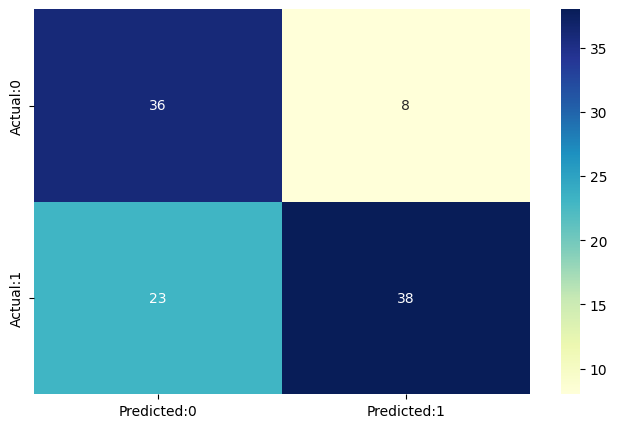

In [ ]:
stevens_tree_deep = DecisionTreeClassifier(min_samples_leaf=2)
stevens_tree_deep.fit(stevens_train2, y_train[spl_train])


predict_deep = stevens_tree_deep.predict(stevens_validate)
confusion_deep = confusion_matrix(y_train[~spl_train], predict_deep)
plot_cm_as_image(confusion_deep)


# Calculate accuracy
accuracy = (confusion_deep[0, 0] + confusion_deep[1, 1]) / sum(sum(confusion_deep))
print("Accuracy:", accuracy)

# Calculate recall
recall = confusion_deep[1, 1] / (confusion_deep[1, 0] + confusion_deep[1, 1])
print("Recall:", recall)

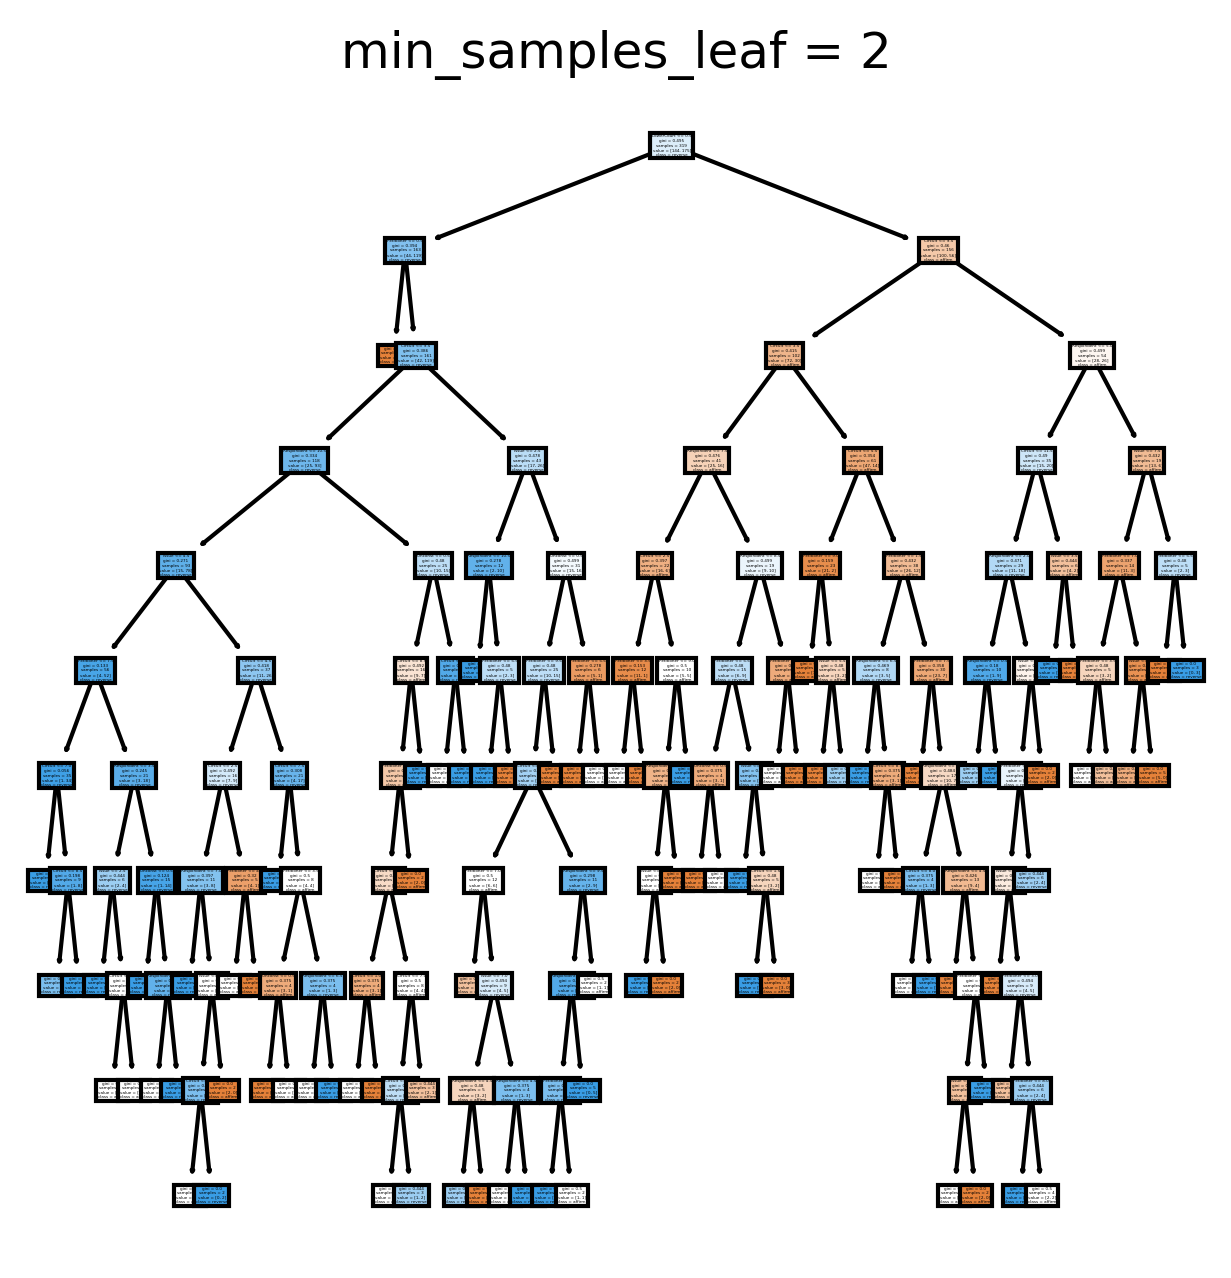

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(5, 5), dpi=300)
plot_tree(stevens_tree_deep, filled=True, feature_names=['Circuit', 'Issue', 'Petitioner', 'Respondent', 'LowerCourt', 'Unconst'], class_names = ["affirm", "reverse"])
plt.title(f"min_samples_leaf = 2")
plt.savefig('out_min_samples_leaf_2.pdf')
plt.show()

**Higher accuracy came with lower interpretability!**


The **maximum depth** of a decision tree can be influenced by several parameters. Here are some of the key parameters that can affect the complexity and depth of a decision tree:

1. **Maximum Depth**: This parameter restricts the maximum depth of the decision tree by specifying the maximum number of levels it can have. Increasing the maximum depth can lead to a more complex tree with more splits and branches.

2. **Minimum Samples Split**: This parameter determines the minimum number of samples required to split an internal node further. If the number of samples at a node is below this threshold, the node will not be split, resulting in a simpler tree. Increasing this parameter can reduce the complexity of the tree.

3. **Minimum Samples Leaf**: This parameter sets the minimum number of samples required to be at a leaf node. If a split would result in a leaf node with fewer samples than this threshold, the split will be canceled. Higher values of this parameter can lead to simpler trees.

4. **Maximum Features**: This parameter determines the maximum number of features or attributes that are considered when looking for the best split at each node. By reducing the number of features, the complexity of the tree can be reduced.

5. **Impurity Criteria**: The impurity criteria, such as Gini Index or Entropy, used to evaluate the quality of a split at each node can also influence the complexity of the decision tree. Different impurity criteria may lead to different splits and subsequently affect the overall complexity of the tree.

6. **Complexity**: Complexity parameter (`ccp_alpha`) used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than `ccp_alpha` will be chosen. By default, no pruning is performed.

It's important to note that these parameters can have **trade-offs**. Increasing the depth of the tree may lead to **overfitting**, where the tree becomes too specific to the training data and performs poorly on unseen data, also affecting the interpretability of the tree. Therefore, it is crucial to tune these parameters carefully based on the specific dataset and desired trade-off between complexity and performance.


Relevant outputs will also be achieved by changing the max_depth value, leaving the model free to construct the best tree.

Accuracy: 0.6666666666666666
Recall: 0.639344262295082


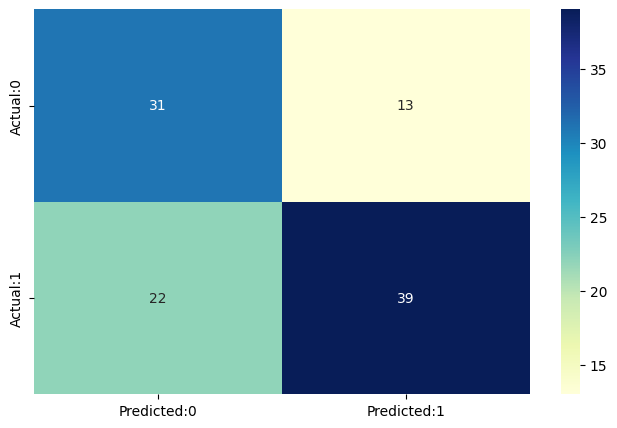

In [ ]:
stevens_tree_max_depth = DecisionTreeClassifier(max_depth=20)
stevens_tree_max_depth.fit(stevens_train2, y_train[spl_train])


predict_max_depth = stevens_tree_max_depth.predict(stevens_validate)
confusion_max_depth = confusion_matrix(y_train[~spl_train], predict_max_depth)
plot_cm_as_image(confusion_max_depth)


# Calculate accuracy
accuracy = (confusion_max_depth[0, 0] + confusion_max_depth[1, 1]) / sum(sum(confusion_max_depth))
print("Accuracy:", accuracy)

# Calculate recall
recall = confusion_max_depth[1, 1] / (confusion_max_depth[1, 0] + confusion_max_depth[1, 1])
print("Recall:", recall)

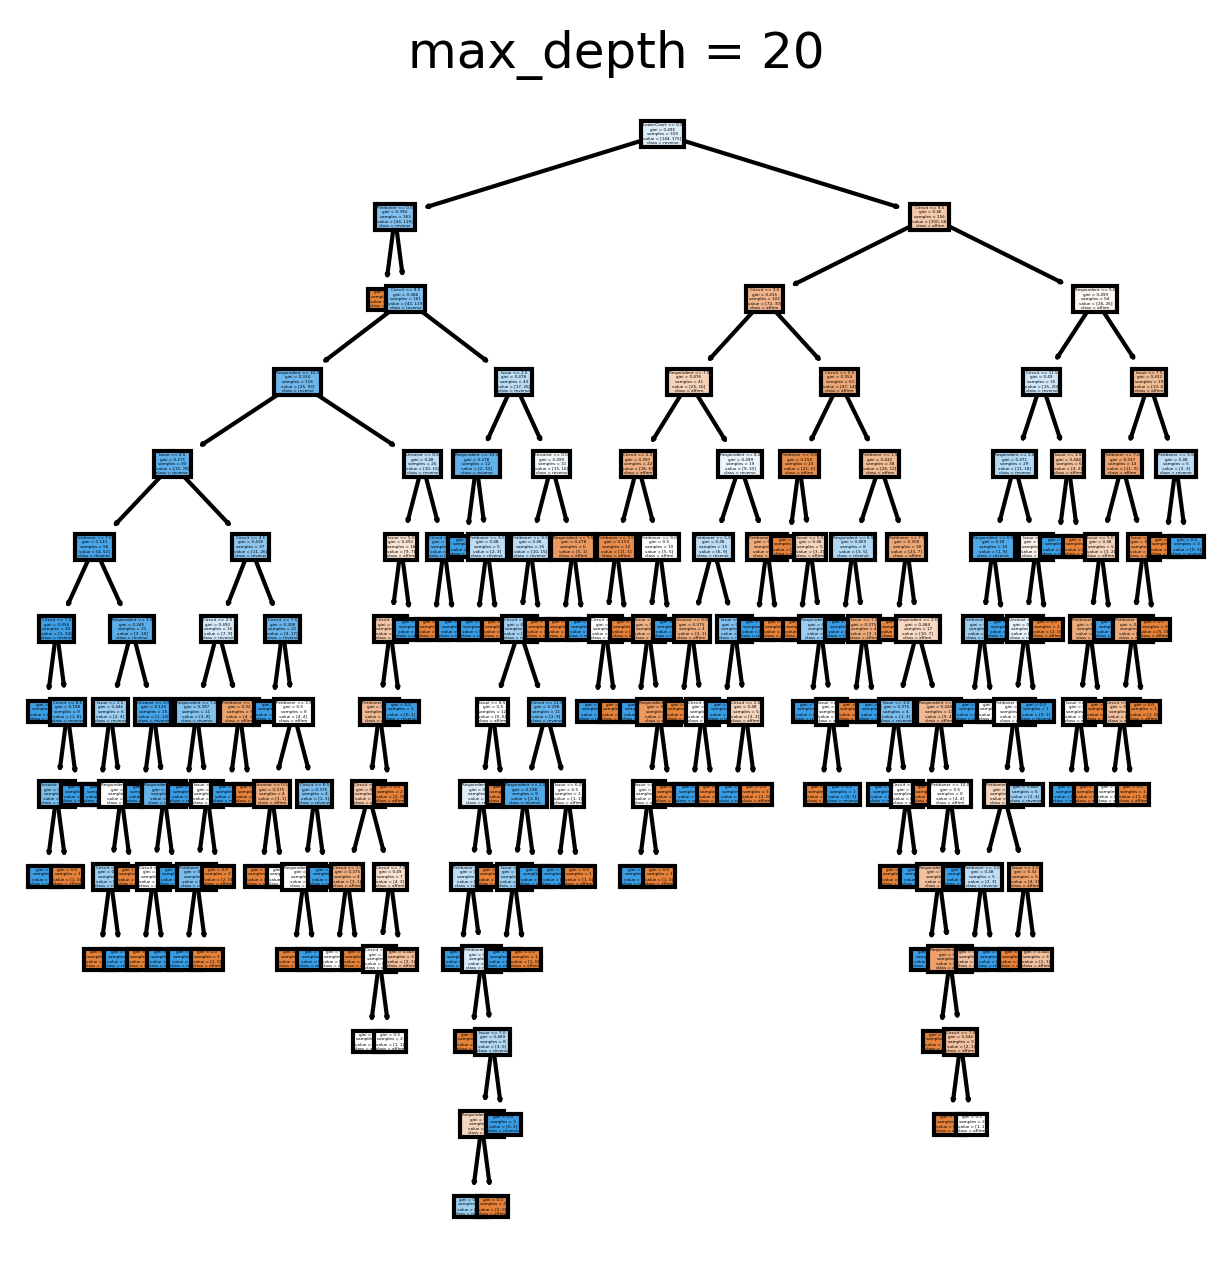

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(5, 5), dpi=300)
plot_tree(stevens_tree_max_depth, filled=True, feature_names=['Circuit', 'Issue', 'Petitioner', 'Respondent', 'LowerCourt', 'Unconst'], class_names = ["affirm", "reverse"])
plt.title(f"max_depth = 20")
plt.savefig('out_max_depth_20.pdf')
plt.show()

Re-build model using all of the training data and the best min_samples_leaf value, and then compute for the test set again

Accuracy: 0.6267605633802817
Recall: 0.6438356164383562


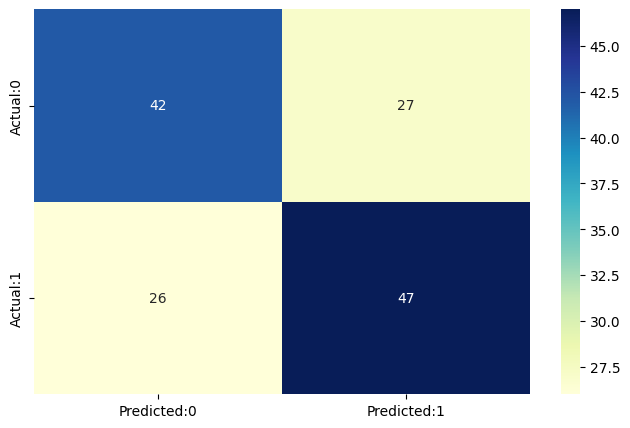

In [ ]:
stevens_tree30 = DecisionTreeClassifier(min_samples_leaf=30)
stevens_tree30.fit(X_train, y_train)


predict30 = stevens_tree30.predict(X_test)
confusion30 = confusion_matrix(y_test, predict30)
plot_cm_as_image(confusion30)

# Calculate accuracy
accuracy = (confusion30[0, 0] + confusion30[1, 1]) / sum(sum(confusion30))
print("Accuracy:", accuracy)

# Calculate recall
recall = confusion30[1, 1] / (confusion30[1, 0] + confusion30[1, 1])
print("Recall:", recall)

## Random Forest

In the code, the random forest model (stevens_forest) is built using the RandomForestClassifier class from scikit-learn. The n_estimators parameter is set to 500 to specify the number of trees in the forest, and the min_samples_leaf parameter is set to 30 to control the minimum number of samples required in a leaf node. The model is trained on the training data (X_train and y_train).

Then, the model is used to predict the target variable for the test data (X_test), and the predictions are compared to the actual values (y_test) to compute the confusion matrix, which can be used to evaluate the accuracy of the random forest model on the test set.

Accuracy: 0.6126760563380281
Recall: 0.6575342465753424


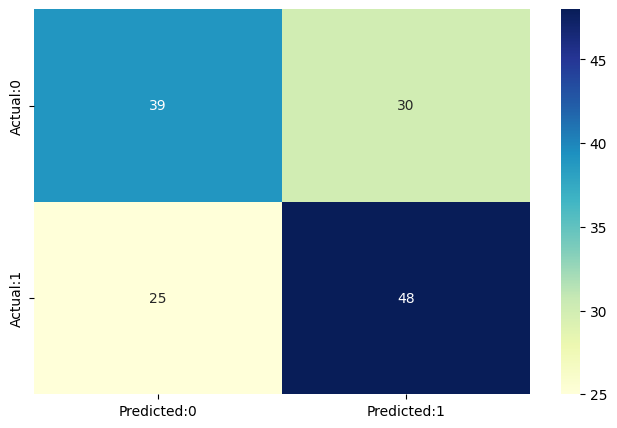

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Build the random forest model
stevens_forest = RandomForestClassifier(n_estimators=500, min_samples_leaf=30)
stevens_forest.fit(X_train, y_train)


# Evaluate the performance of Random Forest.
predict_forest = stevens_forest.predict(X_test)
# Confusion matrix
confusion = confusion_matrix(y_test, predict_forest)
plot_cm_as_image(confusion)

# Calculate accuracy
accuracy = (confusion[0, 0] + confusion[1, 1]) / sum(sum(confusion))
print("Accuracy:", accuracy)

# Calculate recall
recall = confusion[1, 1] / (confusion[1, 0] + confusion[1, 1])
print("Recall:", recall)

### How can I select the best hyperparameters? - Grid Search -

Grid search is a technique used for hyperparameter tuning, where you specify a set of hyperparameter values to explore and the algorithm exhaustively tries all possible combinations of these hyperparameters to find the best performing model. In your example, grid search is used to select the optimal value for the `ccp_alpha` (Cost Complexity Pruning) hyperparameter of the Decision Tree Classifier.

The DecisionTreeClassifier provides parameters such as **min_samples_leaf** and **max_depth** to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Minimal cost complexity pruning recursively finds the node with the “weakest link”. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In the provided Python code, the `GridSearchCV` class is used from scikit-learn, which performs grid search with cross-validation. Here's how it works based on your example:

1. The `param_grid` dictionary is defined, specifying the range of values to be tested for the `ccp_alpha` hyperparameter. In this case, it includes a range of values from 0.01 to 0.5 with an increment of 0.01.

2. The `GridSearchCV` object is instantiated with the decision tree classifier (`DecisionTreeClassifier()`) and the defined parameter grid (`param_grid`). The `cv` parameter is set to 10, indicating that 10-fold cross-validation will be performed.

3. The `fit` method is called on the `GridSearchCV` object with the training data (`X_train` and `y_train`). This triggers the grid search process, where the algorithm fits and evaluates a decision tree classifier for each combination of `ccp_alpha` values using cross-validation.

4. After the grid search is completed, the best model is obtained using `best_estimator_`. This model represents the decision tree classifier with the best performance based on the provided evaluation metric (default is mean accuracy). The best parameters can be accessed using `best_params_`, which provides the value selected for the `min_samples_leaf` hyperparameter.

5. The best model is then used to make predictions on the test set (`X_test`) using the `predict` method.

6. Finally, the confusion matrix is computed using the actual test labels (`y_test`) and the predicted labels (`predict_cv`), providing an evaluation of the model's performance on the test set.

Grid search helps to automate the process of hyperparameter tuning by systematically searching for the best combination of hyperparameters, saving you from manually testing different values. It allows you to find the hyperparameter values that result in the best model performance according to the chosen evaluation metric.

Best parameters: {'ccp_alpha': 0.02}
Accuracy: 0.6338028169014085
Recall: 0.6575342465753424


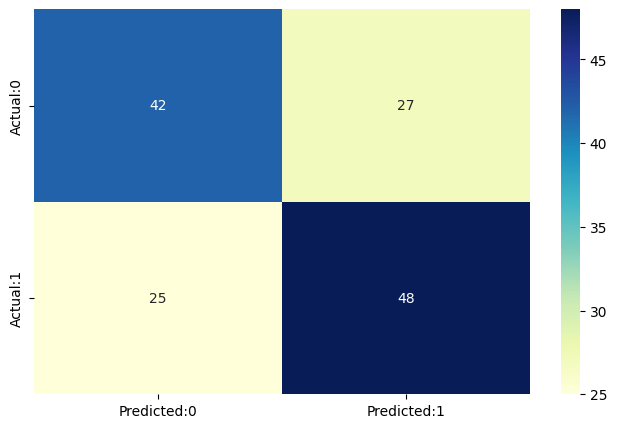

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for cross-validation
param_grid = {'ccp_alpha': np.arange(0.01,0.5,0.01)}

# Perform grid search with cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters
print("Best parameters:", best_params)

# Make predictions using the best model
predict_cv = best_model.predict(X_test)

# Confusion matrix
confusion = confusion_matrix(y_test, predict_cv)
plot_cm_as_image(confusion)

# Calculate accuracy
accuracy = (confusion[0, 0] + confusion[1, 1]) / sum(sum(confusion))
print("Accuracy:", accuracy)

# Calculate recall
recall = confusion[1, 1] / (confusion[1, 0] + confusion[1, 1])
print("Recall:", recall)

In this code, cross-validation with grid search is performed using the GridSearchCV class from scikit-learn. The param_grid dictionary specifies the range of values to be tested for the min_samples_leaf parameter. The code then fits the grid search object to the training data (X_train and y_train), and the best model is obtained using best_estimator_. The best parameters are printed, and predictions are made on the test set (X_test). Finally, the confusion matrix is computed to evaluate the accuracy of the best model on the test set.

In this code, the CART model is built using the DecisionTreeClassifier class from scikit-learn, and the random forest model is built using the RandomForestClassifier class. Both models are trained on the training data (X_train and y_train).

To compute the ROC curves, the predict_proba method is used to obtain the predicted probabilities of the positive class (class 1) for both models. The roc_curve function is then used to compute the false positive rate (FPR) and true positive rate (TPR) for different probability thresholds. The area under the curve (AUC) is calculated using the auc function.

The ROC curves are plotted using matplotlib, with labels and AUC values for each model. The baseline accuracy is calculated as the ratio of the number of instances in the majority class (1) to the total number of instances.

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities on the training set for CART
predict_tree = stevens_tree.predict_proba(X_train)[:, 1]

# Predict probabilities on the training set for random forest
predict_forest = stevens_forest.predict_proba(X_train)[:, 1]

# Compute ROC curve and AUC for CART
fpr_tree, tpr_tree, _ = roc_curve(y_train, predict_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Compute ROC curve and AUC for random forest
fpr_forest, tpr_forest, _ = roc_curve(y_train, predict_forest)
roc_auc_forest = auc(fpr_forest, tpr_forest)

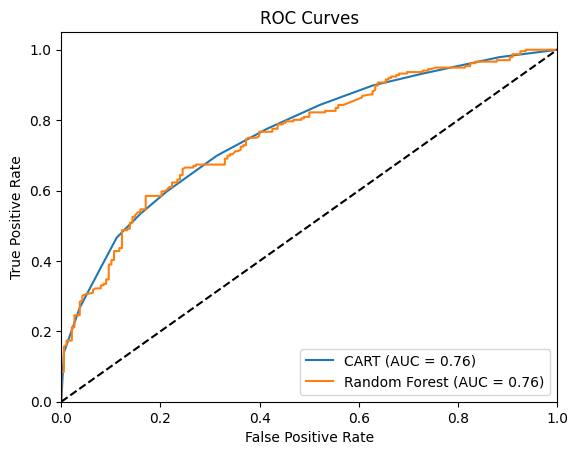

In [ ]:
import matplotlib.pyplot as plt

# Plot the ROC curves
plt.figure()
plt.plot(fpr_tree, tpr_tree, label='CART (AUC = %0.2f)' % roc_auc_tree)
plt.plot(fpr_forest, tpr_forest, label='Random Forest (AUC = %0.2f)' % roc_auc_forest)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()